<a href="https://colab.research.google.com/github/pongsapaks/Data-science/blob/main/Book_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data, Normalization and EDA

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn.over_sampling
import scipy.stats

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('https://raw.githubusercontent.com/pongsapaks/Data-science/main/log2.csv')  

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Action'], axis=1)
y = df['Action']

In [2]:
#data with no EDA
X_trainBasic, X_testBasic, y_trainBasic, y_testBasic = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=42)

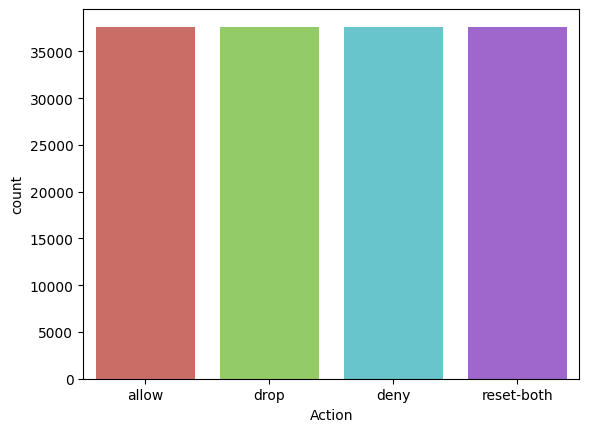

In [3]:
# Apply SMOTE (regular, svm)
sm = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

pca = PCA(n_components=4)
X_res_vis = pca.fit_transform(X_resampled)
sns.countplot(x=y_resampled,data=df,palette='hls')
plt.show()

In [4]:
#Check Shapiro test (Normal distribution)
scipy.stats.shapiro(X_resampled)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.0008408427238464355, pvalue=0.0)

In [5]:
#Normalization
x_normal= (X_resampled - np.min(X_resampled)) / (np.max(X_resampled) / np.min(X_resampled)).values
x_normal

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0               0.0               0.0              0.0                   0.0   
1               0.0               0.0              0.0                   0.0   
2               0.0               0.0              0.0                   0.0   
3               0.0               0.0              0.0                   0.0   
4               0.0               0.0              0.0                   0.0   
...             ...               ...              ...                   ...   
150555          0.0               0.0              0.0                   0.0   
150556          0.0               0.0              0.0                   0.0   
150557          0.0               0.0              0.0                   0.0   
150558          0.0               0.0              0.0                   0.0   
150559          0.0               0.0              0.0                   0.0   

           Bytes  Bytes Sent  Bytes Received       Packets  \
0       0.000006    0.000002             0.0  9.651429e-07   
1       0.000223    0.000097             0.0  1.737257e-05   
2       0.000008    0.000004             0.0  9.651429e-07   
3       0.000154    0.000087             0.0  1.351200e-05   
4       0.001196    0.000425             0.0  2.895429e-05   
...          ...         ...             ...           ...   
150555  0.000011    0.000010             0.0  2.895429e-06   
150556  0.000004    0.000005             0.0  0.000000e+00   
150557  0.000003    0.000005             0.0  0.000000e+00   
150558  0.000004    0.000005             0.0  0.000000e+00   
150559  0.000003    0.000004             0.0  0.000000e+00   

        Elapsed Time (sec)  pkts_sent  pkts_received  
0                      0.0   0.000000            0.0  
1                      0.0   0.000012            0.0  
2                      0.0   0.000000            0.0  
3                      0.0   0.000009            0.0  
4                      0.0   0.000016            0.0  
...                    ...        ...            ...  
150555                 0.0   0.000003            0.0  
150556                 0.0   0.000000            0.0  
150557                 0.0   0.000000            0.0  
150558                 0.0   0.000000            0.0  
150559                 0.0   0.000000            0.0  

[150560 rows x 11 columns]

## EDA - data for KNN

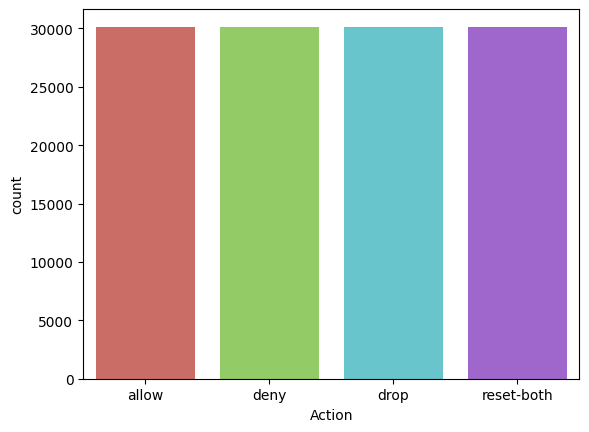

In [6]:
# split x after normalized - for KNN usage
X_train, X_test, y_train, y_test = train_test_split(x_normal, y_resampled,train_size=0.8, test_size=0.2, random_state=42)
sns.countplot(x=y_train,data=df,palette='hls')
plt.show()

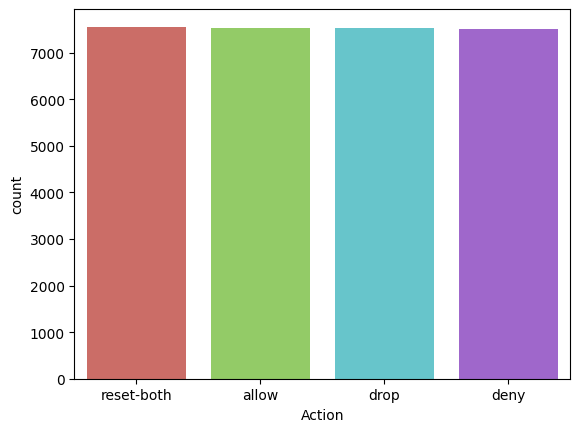

In [7]:
sns.countplot(x=y_test,data=df,palette='hls')
plt.show()

## EDA - data for trees

In [8]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features=4)
sel.fit(X_resampled, y_resampled)
sel.get_support()
selected_feat= X_resampled.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)
 
X_tree = X_resampled.loc[:,selected_feat]
X_tree
 
X_trainTree, X_testTree, y_trainTree, y_testTree = train_test_split(X_tree, y_resampled,train_size=0.8, test_size=0.2, random_state=42)

4
Index(['Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)'], dtype='object')


# Decision Tree Clasification

In [10]:
# Pipeline for Decision Tree Classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn.over_sampling
import scipy.stats

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import SelectFromModel
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

df = pd.read_csv('https://raw.githubusercontent.com/pongsapaks/Data-science/main/log2.csv')

X = df.drop(['Action'], axis=1)
y = df['Action']

## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## handle imbalanced data
sm = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

## features selection
sel = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=4)
sel.fit(X_train_resampled, y_train_resampled)
selected_feat = X_train.columns[(sel.get_support())]

## create a pipeline
pipeline_dec = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto')),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=4)),
    ('classifier', DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 10, min_samples_split=2, min_samples_leaf= 5, ccp_alpha=0.0175))
])

params = {
    'max_depth': [2, 3, 4, 5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

## fit the pipeline with training data
pipeline_dec.fit(X_train, y_train)

## predict the labels of new data
y_predicted = pipeline_dec.predict(X_test)

## print classification report
print(classification_report(y_test, y_predicted))

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7545
        deny       0.97      0.84      0.90      2994
        drop       1.00      1.00      1.00      2562
  reset-both       0.01      1.00      0.02         6

    accuracy                           0.96     13107
   macro avg       0.74      0.96      0.73     13107
weighted avg       0.99      0.96      0.97     13107



In [11]:
# 1) Decision Tree Classification using all 'Default' parameters (gini, best splitter, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_initial = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
classifier_initial.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier()

In [12]:
y_predicted_initial = classifier_initial.predict(X_testTree) 

In [13]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Gini:", metrics.accuracy_score(y_testTree, y_predicted_initial))

Accuracy Gini: 0.9881774707757705


In [14]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_initial})  
data_p

Actual   Predicted
141903  reset-both  reset-both
33504        allow       allow
11910        allow       allow
103358        drop        drop
140620  reset-both  reset-both
...            ...         ...
59307        allow       allow
27169        allow       allow
138215  reset-both  reset-both
964           drop        drop
47744        allow       allow

[30112 rows x 2 columns]

In [15]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_initial))  
print(classification_report(y_testTree, y_predicted_initial)) 

[[7524    2    0    0]
 [   1 7317   14  171]
 [   0    0 7528    0]
 [   0  168    0 7387]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.98      0.98      0.98      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.98      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_initial, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.98542964 0.98804483 0.98912412 0.98654988 0.98833492]
Average cross-validation score: 0.9874966781635715


In [17]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_initial, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['allow','deny','drop','reset-both'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.339431 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.339431 to fit



In [18]:
# Use Grid Search for tuning hyperparameters

from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [19]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"]
}

In [20]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [21]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [22]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.242540      0.036231         0.029958        0.011294   
1       0.197155      0.009312         0.039662        0.003358   
2       0.301336      0.009299         0.043199        0.004926   
3       0.146948      0.037517         0.032585        0.011277   
4       0.154241      0.004163         0.019815        0.000503   

  param_criterion param_max_depth param_min_samples_leaf param_splitter  \
0            gini               2                      5           best   
1            gini               2                      5         random   
2            gini               2                     10           best   
3            gini               2                     10         random   
4            gini               2                     20           best   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.981497   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.774058   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.981497   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.774058   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.981497   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.981402           0.982451           0.980162           0.980830   
1           0.776347           0.776252           0.775870           0.779495   
2           0.981402           0.982451           0.980162           0.980830   
3           0.776347           0.776252           0.775870           0.779495   
4           0.981402           0.982451           0.980162           0.980830   

   mean_test_score  std_test_score  rank_test_score  
0         0.981268        0.000760              136  
1         0.776404        0.001753              196  
2         0.981268        0.000760              136  
3         0.776404        0.001753              196  
4         0.981268        0.000760              136

In [23]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
114       0.212345      0.010215         0.020456        0.000937   
124       0.329463      0.061623         0.029477        0.007244   
134       0.211277      0.006297         0.021500        0.002702   
184       0.203663      0.005081         0.020174        0.000652   
194       0.206834      0.007547         0.020109        0.000593   

    param_criterion param_max_depth param_min_samples_leaf param_splitter  \
114         entropy              10                     20           best   
124         entropy              15                     20           best   
134         entropy              20                     20           best   
184        log_loss              10                     20           best   
194        log_loss              15                     20           best   

                                                params  split0_test_score  \
114  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.998283   
124  {'criterion': 'entropy', 'max_depth': 15, 'min...           0.998283   
134  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.998283   
184  {'criterion': 'log_loss', 'max_depth': 10, 'mi...           0.998283   
194  {'criterion': 'log_loss', 'max_depth': 15, 'mi...           0.998283   

     split1_test_score  split2_test_score  split3_test_score  \
114           0.998188           0.998093           0.998093   
124           0.998188           0.998093           0.998093   
134           0.998188           0.998093           0.998093   
184           0.998188           0.998093           0.998093   
194           0.998188           0.998093           0.998093   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
114           0.997902         0.998112        0.000127                1  
124           0.997902         0.998112        0.000127                1  
134           0.997902         0.998112        0.000127                1  
184           0.997902         0.998112        0.000127                1  
194           0.997902         0.998112        0.000127                1

In [24]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       random_state=42)

In [25]:
# 2) Decision Tree Classification using entropy, splitter = best, max_depth = 10, min_samples_leaf = 5, ccp_alpha = 0.0175

from sklearn.tree import DecisionTreeClassifier                             
classifier_final = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 10, min_samples_split=2, min_samples_leaf= 5, ccp_alpha=0.0175)
classifier_final.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(ccp_alpha=0.0175, criterion='entropy', max_depth=10,
                       min_samples_leaf=5)

In [26]:
y_predicted_final = classifier_final.predict(X_testTree) 

In [27]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy after tuning hyperparameters:", metrics.accuracy_score(y_testTree, y_predicted_final))

Accuracy after tuning hyperparameters: 0.9318876195536663


In [28]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_final})  
data_p

Actual   Predicted
141903  reset-both  reset-both
33504        allow       allow
11910        allow        deny
103358        drop        drop
140620  reset-both  reset-both
...            ...         ...
59307        allow       allow
27169        allow       allow
138215  reset-both  reset-both
964           drop        drop
47744        allow       allow

[30112 rows x 2 columns]

In [29]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_final))  
print(classification_report(y_testTree, y_predicted_final)) 

[[7430   96    0    0]
 [   0 5768   14 1721]
 [   0    0 7528    0]
 [   0  220    0 7335]]
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7526
        deny       0.95      0.77      0.85      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.81      0.97      0.88      7555

    accuracy                           0.93     30112
   macro avg       0.94      0.93      0.93     30112
weighted avg       0.94      0.93      0.93     30112



In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_final, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.93179743 0.93345787 0.93370693 0.9308398  0.93457595]
Average cross-validation score: 0.9328755949833949


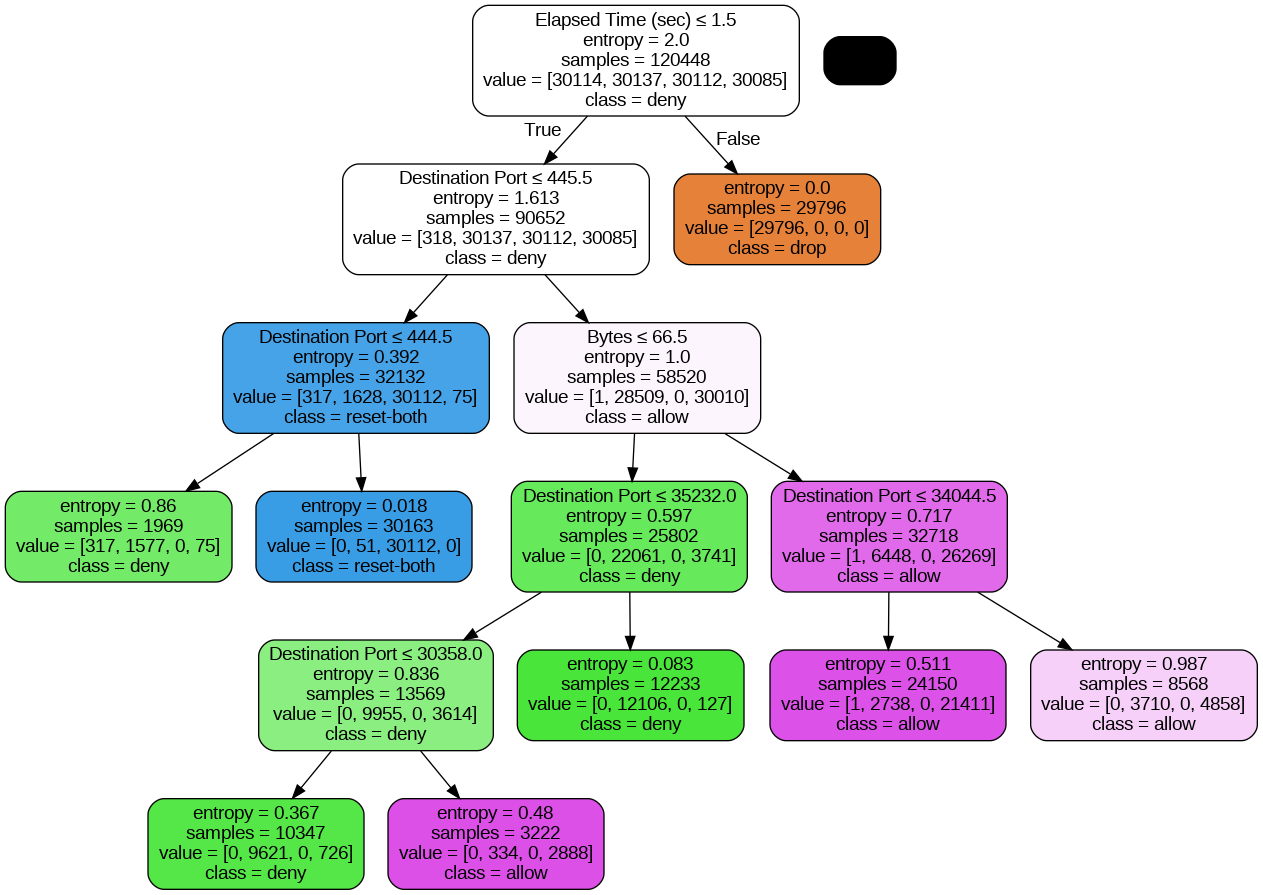

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_final, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile_Gini.png')
Image(graph.create_png())